In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.17.0'

In [3]:
from tensorflow import keras

In [4]:
keras.__version__

'3.4.1'

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras import Sequential
from tensorflow.keras import layers

## Data Preparation

### 1- Load Data

In [42]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

### 2- Data Inspection

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [18]:
print(x_train.ndim)
print(x_test.ndim)

3
3


In [19]:
print(x_train.dtype)
print(y_train.dtype)
print(x_test.dtype)
print(y_test.dtype)


uint8
uint8
uint8
uint8


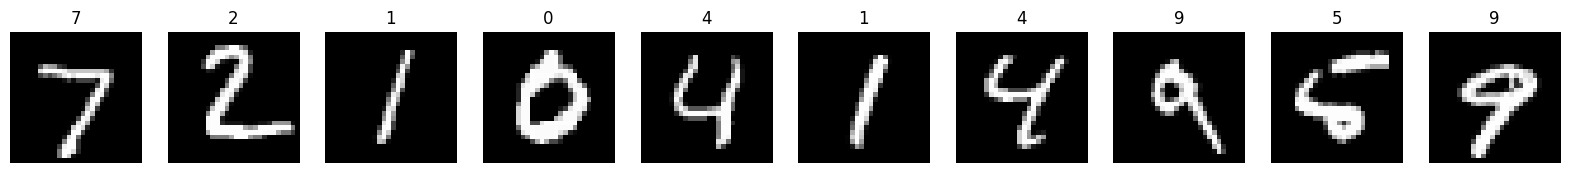

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for i in range(10):
    axes[i].imshow(x_test[i], cmap='gray')
    axes[i].set_title(y_test[i])
    axes[i].set_axis_off()
plt.show()

### 3- Pre-processing

In [43]:
x_train_vector = x_train.reshape(60000, 784)
x_test_vector = x_test.reshape(10000, 784)

In [27]:
x_train[0].shape

(784,)

#### Normalization

In [44]:
x_train_normalized = x_train_vector.astype('float32') / 255
x_test_normalized = x_test_vector.astype('float32') / 255

In [46]:
x_test_normalized.max()

1.0

## Model Design

In [73]:
model = Sequential(
    [
        layers.Dense(100, activation='relu', input_shape=(784,)),
        layers.Dense(10, activation='softmax')
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

## Training

In [70]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [74]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
history = model.fit(x_train_normalized, y_train,
                    batch_size=256,
                    epochs=20)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8435 - loss: 0.5217
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9580 - loss: 0.1414
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9716 - loss: 0.0930
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9772 - loss: 0.0726
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9829 - loss: 0.0550
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9844 - loss: 0.0473
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9894 - loss: 0.0358
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9913 - loss: 0.0295
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9917 - loss: 0.0252
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9931 - loss: 0.0212
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9945 - loss: 0.0178
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

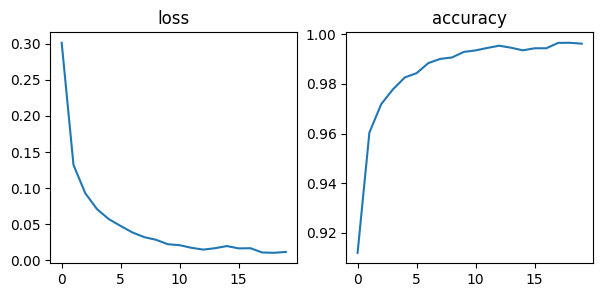

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
axes[0].plot(history.history['loss'])
axes[0].set_title('loss')
axes[1].plot(history.history['accuracy'])
axes[1].set_title('accuracy')
plt.show()

## Evaluation

In [93]:
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9690 - loss: 0.1568
test loss: 0.13387088477611542
test accuracy: 0.9747999906539917


In [82]:
x_test_normalized[0].shape

(784,)

## Prediction

In [88]:
pred = model.predict(x_test_normalized[8].reshape(1, 784))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [90]:
print('prediction:', pred.argmax())
print('true label:', y_test[8])

prediction: 5
true label: 5
